In [14]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [15]:
X,y=make_moons(n_samples=900,noise=0.2,random_state=42)

In [16]:
X[:2],y[:5]

(array([[1.19499881, 0.58156033],
        [2.29266225, 0.2954463 ]]),
 array([0, 1, 0, 1, 0], dtype=int64))

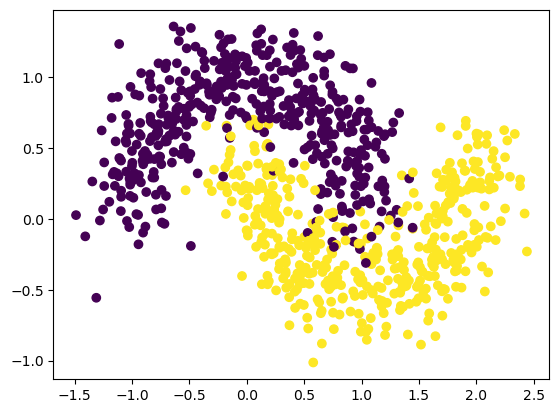

In [17]:
plt.scatter(X[:,0],X[:,1],c=y)

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
log_clf=LogisticRegression()
rnd_clf=RandomForestClassifier()
svm_clf=SVC()
voting_clf=VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('SVC',svm_clf)],voting='hard')

In [20]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('SVC', SVC())])

In [22]:
for clf in(log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.8666666666666667
RandomForestClassifier 0.9611111111111111
SVC 0.9666666666666667
VotingClassifier 0.9666666666666667
